<a href="https://colab.research.google.com/github/ernanibn/reconhecimento_padroes_23/blob/main/aula3a_multiclasse_Exerc%C3%ADcio_Resolvido_Ernani_Brand%C3%A3o_Nascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [3]:
set(y)

{0, 1, 2}

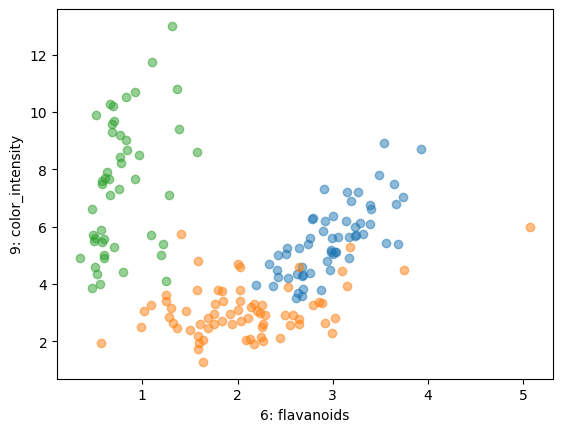

In [4]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [6]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [7]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.12771988e-04, 8.91685486e-05, 8.03470612e-05, 6.83403015e-03,
        9.10758972e-05]),
 'score_time': array([0.00213265, 0.00191426, 0.00184989, 0.00182247, 0.00226283]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[20,  1,  0],
       [ 1, 14,  2],
       [ 3,  8,  5]])

In [9]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6745571658615138

In [10]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [11]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.02758408e-04, 9.72747803e-05, 8.41617584e-05, 8.20159912e-05,
        5.13315201e-04]),
 'score_time': array([0.00366235, 0.00337672, 0.00309086, 0.00313878, 0.00315857]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [12]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([9.34600830e-05, 1.06096268e-04, 7.27176666e-05, 8.77380371e-05,
        9.96589661e-05]),
 'score_time': array([0.00639057, 0.00503469, 0.00479698, 0.01176453, 0.01813841]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.02281570e-04, 1.08480453e-04, 9.10758972e-05, 9.63211060e-05,
        1.03950500e-04, 1.01566315e-04, 1.00135803e-04, 1.05142593e-04,
        1.34229660e-04, 1.16586685e-04, 9.58442688e-05, 8.67843628e-04,
        1.15156174e-04, 1.06334686e-04, 1.33991241e-04, 7.89165497e-05,
        1.23977661e-04, 1.00851059e-04, 1.17063522e-04, 2.62022018e-04,
        1.02519989e-04, 1.02519989e-04, 1.00135803e-04, 1.18255615e-04,
        7.10487366e-05, 9.89437103e-05, 1.04188919e-04, 1.00135803e-04,
        1.01566315e-04, 9.65595245e-05, 1.16348267e-04, 1.16586685e-04,
        1.11341476e-04, 1.07526779e-04, 1.18494034e-04, 8.58306885e-05,
        9.34600830e-05, 1.00374222e-04, 1.10387802e-04, 8.20159912e-05,
        8.13007355e-05, 9.44137573e-05, 6.29425049e-05, 9.79900360e-05,
        8.36849213e-05, 6.46114349e-05, 8.48770142e-05, 9.08374786e-05,
        9.15527344e-05, 9.53674316e-05]),
 'score_time': array([0.00958872, 0.00828505, 0.00774407, 0.00820756, 0.00752544,


In [14]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        # cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.060142857142857144)

In [15]:
modelo.intercept_

array([-155.,  127.,   25.])

In [16]:
modelo.coef_[:,[6,9]]

array([[  269.94    , -1015.949996],
       [  569.3     , -1606.689988],
       [ -495.31    ,  1508.709994]])

In [17]:
# Função para definição do hyperplano
def plot_hyperplane(c, color, coef, intercept):
    def line(x):
        return -((x * coef[c, 0]) + intercept[c])/coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


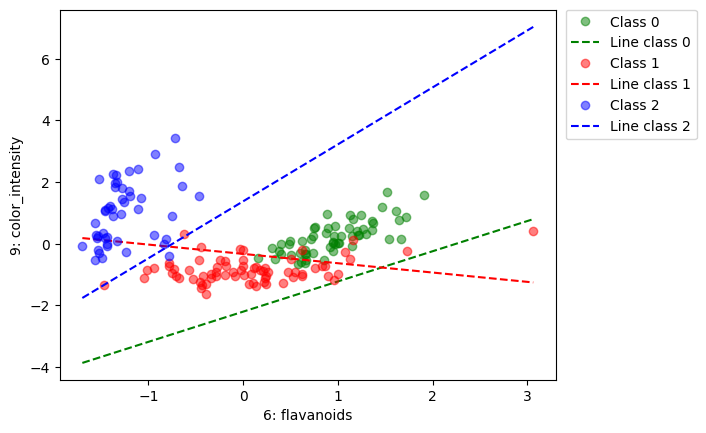

In [25]:
# Modelo fit com apenas as duas features escolhidas(6, 9) para a classificação
i, j = 6, 9
Xdec = X[:,[i,j]]

# Normalização dos valores
mean = Xdec.mean(axis=0)
std = Xdec.std(axis=0)
Xdec = (Xdec - mean) / std

# definição do Modelo
modelo = Perceptron()
modelo.fit(Xdec, y)

plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

set_color = ['g', 'r', 'b']

# definição do máximo e mínimo
xmin, xmax = min(Xdec[:,0]), max(Xdec[:,0])

for k in set(y):
  plt.plot(Xdec[:,0][y==k], Xdec[:,1][y==k], "o", alpha=0.5, color=set_color[k])
  plot_hyperplane(k, set_color[k],modelo.coef_, modelo.intercept_)

plt.legend(['Class 0', 'Line class 0', 'Class 1', 'Line class 1',
            'Class 2', 'Line class 2']
           , loc=(1.02, 0.65))
plt.show()


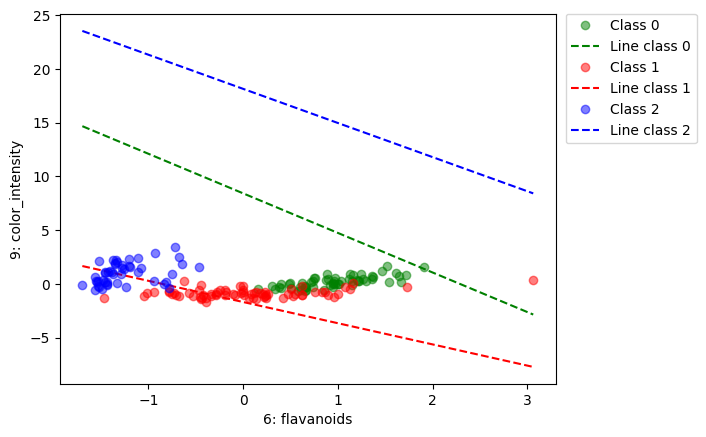

In [32]:
Xdec = X

# Normalização dos valores

mean = Xdec.mean(axis=0)
std = Xdec.std(axis=0)
Xdec = (Xdec - mean) / std
from sklearn.linear_model import SGDClassifier

# definição do Modelo
modelo = Perceptron()
modelo.fit(Xdec, y)

i, j = 6, 9

plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

set_color = ['g', 'r', 'b']

xmin, xmax = min(Xdec[:,i]), max(Xdec[:,i])

for k in set(y):
  plt.plot(Xdec[:,i][y==k], Xdec[:,j][y==k], "o", alpha=0.5, color=set_color[k])
  plot_hyperplane(k, set_color[k],modelo.coef_, modelo.intercept_)


plt.legend(['Class 0', 'Line class 0', 'Class 1', 'Line class 1',
            'Class 2', 'Line class 2']
           , loc=(1.02, 0.65))
plt.show()
